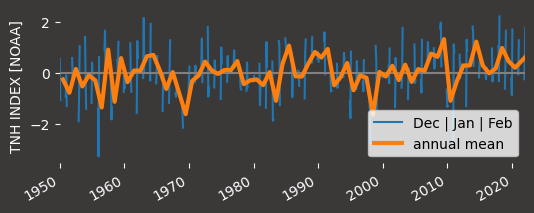

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import get_TNH_idx
import matplotlib as mpl

#
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
#

# Monthly Teleconnection Index: Tropical/ Northern Hemisphere (TNH) Pattern
# get data from ftp://ftp.cpc.ncep.noaa.gov/wd52dg/data/indices/tnh_index.tim (downloaded at 20.06.2023 T17:00)
# Indices are normalized using the 1981-2010 base period monthly means and standard deviations.
# Values are set to -99.90 for calendar months when the pattern
# is not normally a leading mode of variability.

TNH = get_TNH_idx(dropna=False)

fig = plt.figure(figsize=(6,2),facecolor='#3b3838')
ax = fig.add_subplot(facecolor='#3b3838')
plt.box(False)

TNH.plot(ax=ax,label='Dec | Jan | Feb')
ax.axhline(0,color='grey')

# shift december into the next year
TNH_ann = TNH.assign_coords(time=TNH.time+pd.Timedelta(days=31)).groupby('time.year').mean()
TNH_ann = TNH_ann.assign_coords(time=('year',pd.to_datetime(TNH_ann.year,format='%Y')+pd.Timedelta(days=180))).swap_dims(dict(year='time'))
TNH_ann.plot(lw=3,label='annual mean')
ax.set_xlim(pd.Timestamp('1950'),pd.Timestamp('2022'))
ax.set_ylabel('TNH INDEX [NOAA]')
ax.set_xlabel('')
ax.legend(loc='lower right',facecolor='white')

fig.savefig('figures/TNH_INDEX_raw.png',dpi=200,bbox_inches='tight',pad_inches=.1)